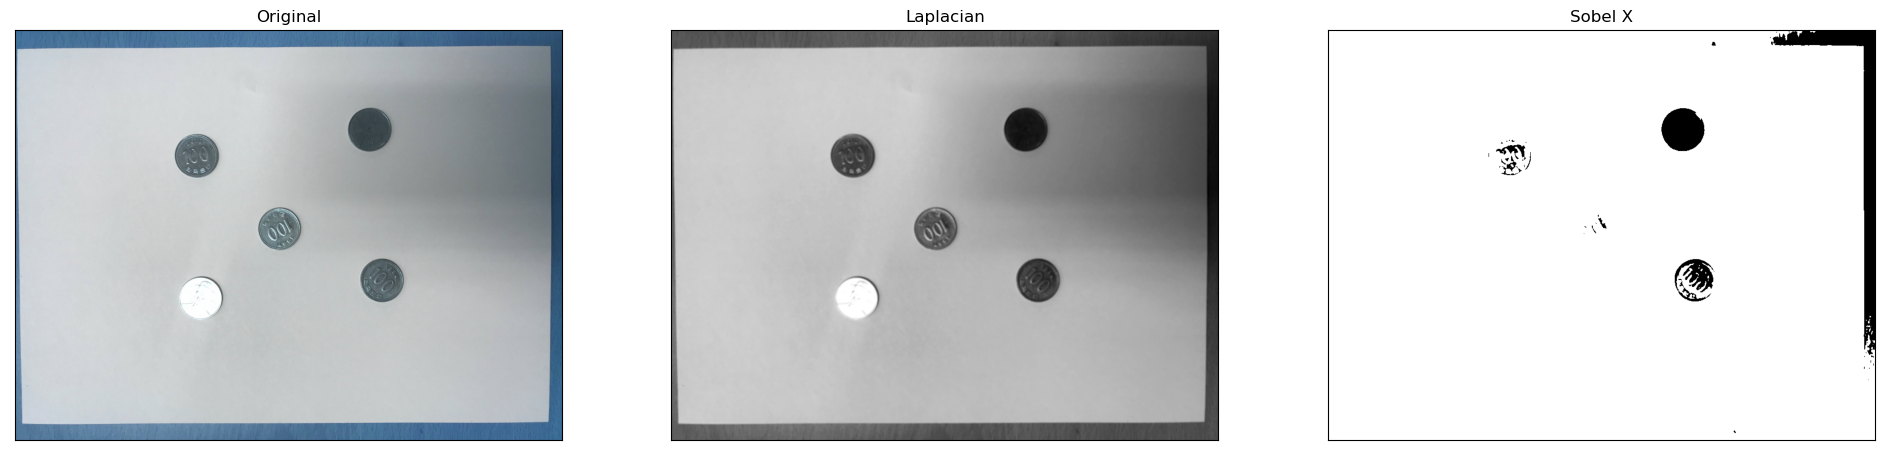

{'m00': 16.0, 'm10': 16331.666666666666, 'm01': 9339.833333333332, 'm20': 16670239.333333332, 'm11': 9533450.666666666, 'm02': 5452049.5, 'm30': 17015862418.900002, 'm21': 9731099727.116667, 'm12': 5565078053.05, 'm03': 3182599385.8500004, 'mu20': 30.826388888061047, 'mu11': 10.371527777984738, 'mu02': 19.081597223877907, 'mu30': -14.735700607299805, 'mu21': -8.432087591612799, 'mu12': 1.7469756569116726, 'mu03': 5.040066719055176, 'nu20': 0.12041558159398846, 'nu11': 0.040513780382752884, 'nu02': 0.07453748915577307, 'nu30': -0.014390332624316216, 'nu21': -0.008234460538684374, 'nu12': 0.0017060309149528052, 'nu03': 0.00492194015532732}


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('coin.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))
 
cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(approx)
x,y,w,h = cv2.boundingRect(cnt)
rect = cv2.minAreaRect(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)


